In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv("C:/Users/swath/Downloads/city_temperature.csv/city_temperature.csv")
df.head()

C:\Users\swath\AppData\Local\Temp\ipykernel_16120\2662017491.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/swath/Downloads/city_temperature.csv/city_temperature.csv")


Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9

In [4]:
df.isna().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [5]:
df = df.drop('State',axis=1)
df.head()

Region  Country     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria  Algiers      1    1  1995            64.2
1  Africa  Algeria  Algiers      1    2  1995            49.4
2  Africa  Algeria  Algiers      1    3  1995            48.8
3  Africa  Algeria  Algiers      1    4  1995            46.4
4  Africa  Algeria  Algiers      1    5  1995            47.9

In [6]:
df.describe()

Month           Day          Year  AvgTemperature
count  2.906327e+06  2.906327e+06  2.906327e+06    2.906327e+06
mean   6.469163e+00  1.571682e+01  2.006624e+03    5.600492e+01
std    3.456489e+00  8.800534e+00  2.338226e+01    3.212359e+01
min    1.000000e+00  0.000000e+00  2.000000e+02   -9.900000e+01
25%    3.000000e+00  8.000000e+00  2.001000e+03    4.580000e+01
50%    6.000000e+00  1.600000e+01  2.007000e+03    6.250000e+01
75%    9.000000e+00  2.300000e+01  2.013000e+03    7.550000e+01
max    1.200000e+01  3.100000e+01  2.020000e+03    1.100000e+02

In [7]:
df['Year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020,  201,  200], dtype=int64)

In [8]:
df.loc[df['Year']==200,'Year']=2000
df.loc[df['Year']==201,'Year']=2010
df.head()

Region  Country     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria  Algiers      1    1  1995            64.2
1  Africa  Algeria  Algiers      1    2  1995            49.4
2  Africa  Algeria  Algiers      1    3  1995            48.8
3  Africa  Algeria  Algiers      1    4  1995            46.4
4  Africa  Algeria  Algiers      1    5  1995            47.9

In [9]:
a= df.groupby(['Year','Region'])['AvgTemperature'].mean().reset_index().sort_values(by='AvgTemperature',ascending=False)
a.head(20).style.background_gradient(cmap='Blues')

C:\Users\swath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


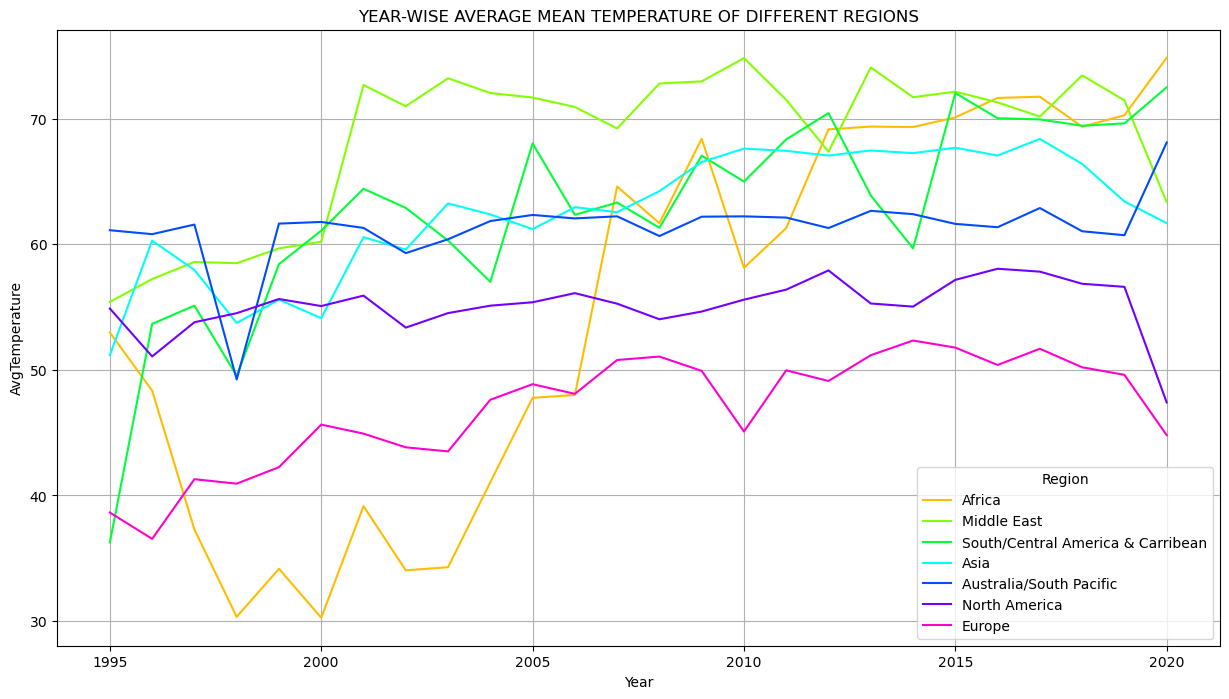

In [10]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='AvgTemperature',hue='Region',data=a,palette='hsv')
plt.grid()
plt.title('YEAR-WISE AVERAGE MEAN TEMPERATURE OF DIFFERENT REGIONS')
plt.show()

In [11]:
b= df.groupby(['Region','Month'])['AvgTemperature'].max().reset_index().sort_values(by='AvgTemperature',ascending=False)
b.head(20).style.background_gradient(cmap='Oranges')

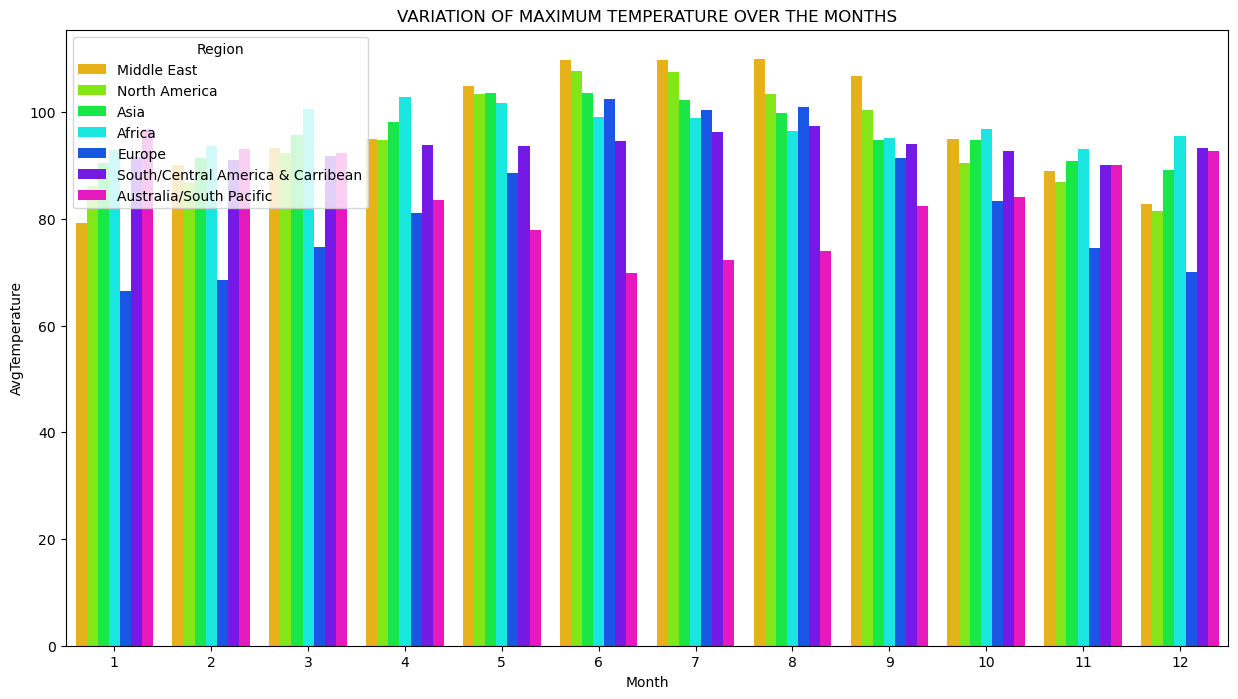

In [12]:
plt.figure(figsize=(15,8))
sns.barplot(x='Month', y= 'AvgTemperature',data=b,hue='Region',palette='hsv',saturation=.80)
plt.title('VARIATION OF MAXIMUM TEMPERATURE OVER THE MONTHS')
plt.show()

In [13]:
c= df.groupby(['Region','Year'])['AvgTemperature'].max().reset_index().sort_values(by='AvgTemperature',ascending=False)
c.head(20).style.background_gradient(cmap='Greens')

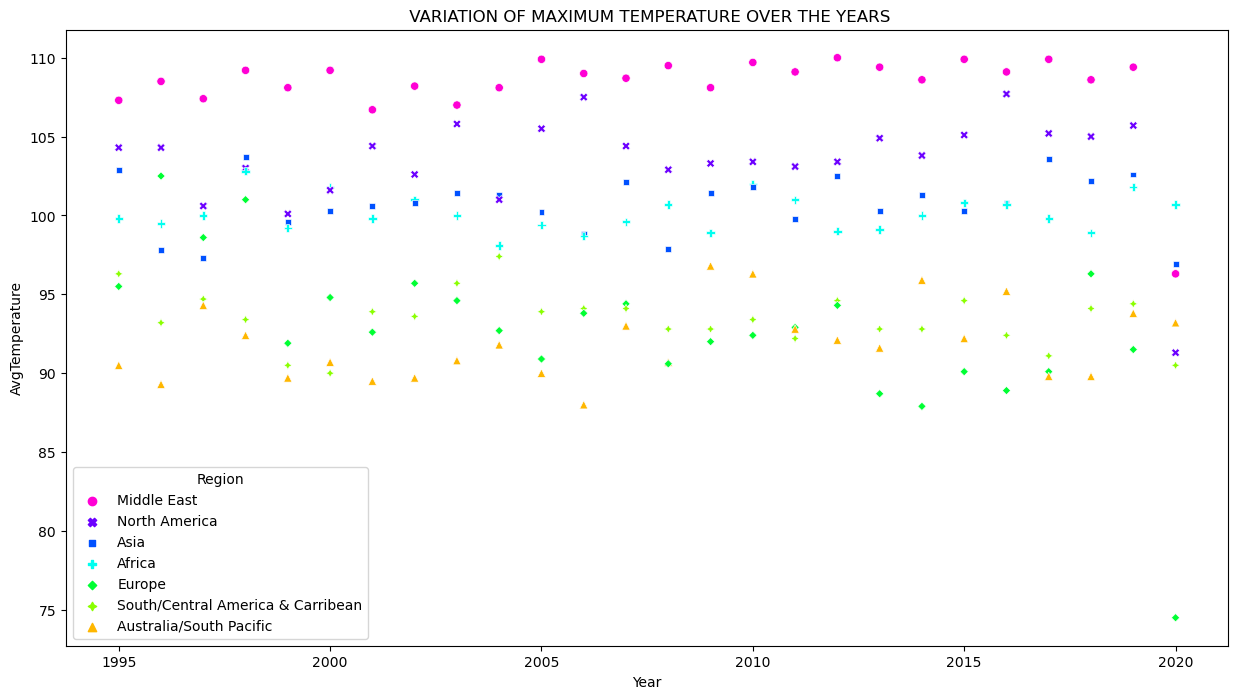

In [14]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Year',y='AvgTemperature',data=c,hue='Region',palette='hsv_r',style='Region')
plt.title(' VARIATION OF MAXIMUM TEMPERATURE OVER THE YEARS')
plt.show()

In [15]:
c= df.groupby(['Country','City'])['AvgTemperature'].mean().reset_index().sort_values(by='AvgTemperature',ascending=False).head(20)
c.style.background_gradient(cmap='Reds')

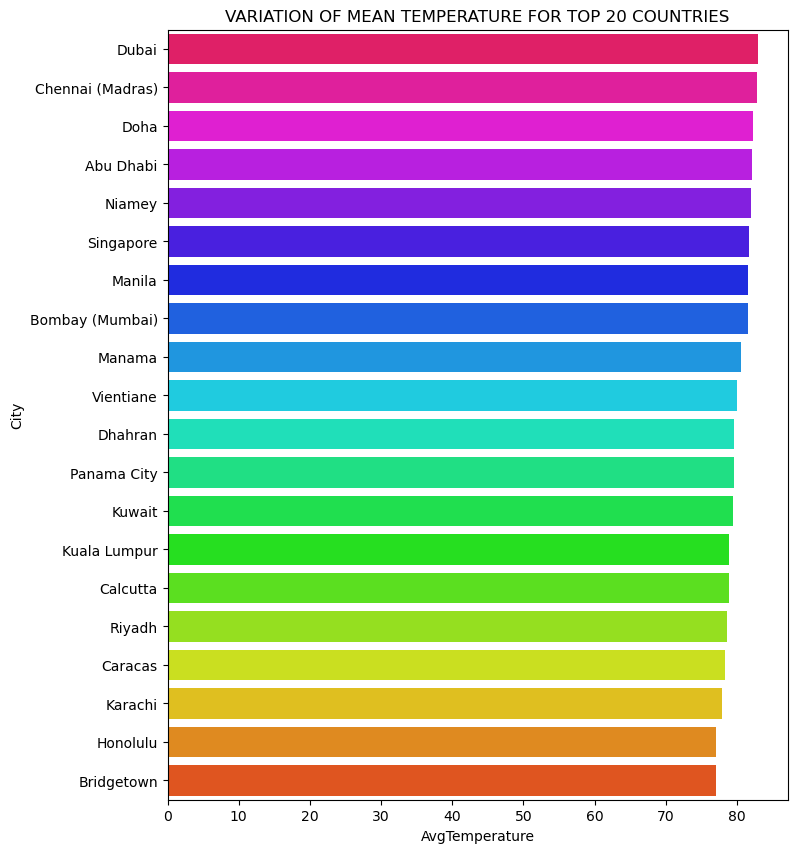

In [16]:
plt.figure(figsize=(8,10))
sns.barplot(x='AvgTemperature',y='City',data=c,palette='hsv_r')
plt.title('VARIATION OF MEAN TEMPERATURE FOR TOP 20 COUNTRIES')
plt.show()

In [18]:
ind=df[df['Country']=='India']
x= ind.groupby(['Year'])['AvgTemperature'].mean().reset_index().sort_values(by='AvgTemperature',ascending=False)
x.style.background_gradient(cmap='hsv')

In [19]:
ind=df[df['Country']=='India']
x= ind.groupby(['City','Year'])['AvgTemperature'].max().reset_index().sort_values(by='AvgTemperature',ascending=False)
x.head(20).style.background_gradient(cmap='Blues')

C:\Users\swath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


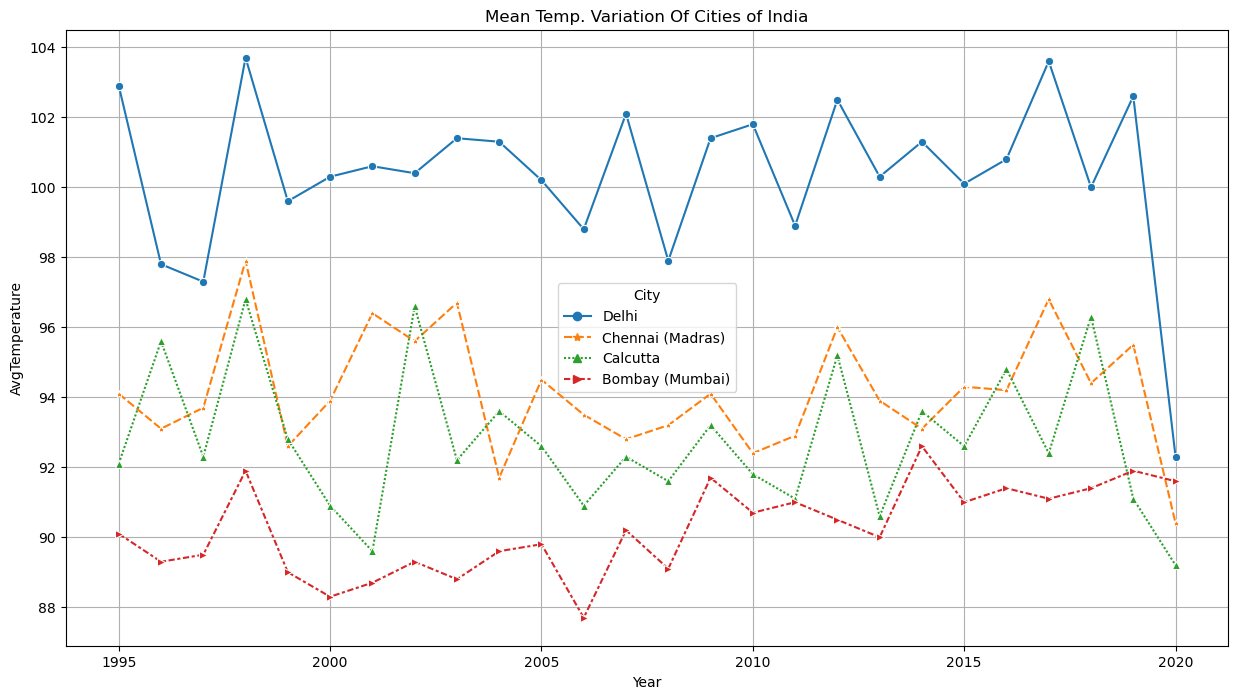

In [20]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='AvgTemperature',data=x,hue='City',style='City',markers=['o','*','^','>'])
plt.grid()
plt.title('Mean Temp. Variation Of Cities of India')
plt.show()

In [21]:
mask1=df['Country']=='India'
mask2=df['City']=='Delhi'

ind=df[mask1 & mask2 ]


y= ind.groupby(['Year','City','Month'])['AvgTemperature'].mean().reset_index().sort_values(by='AvgTemperature',ascending=False)
y.head(20).style.background_gradient(cmap='PiYG')

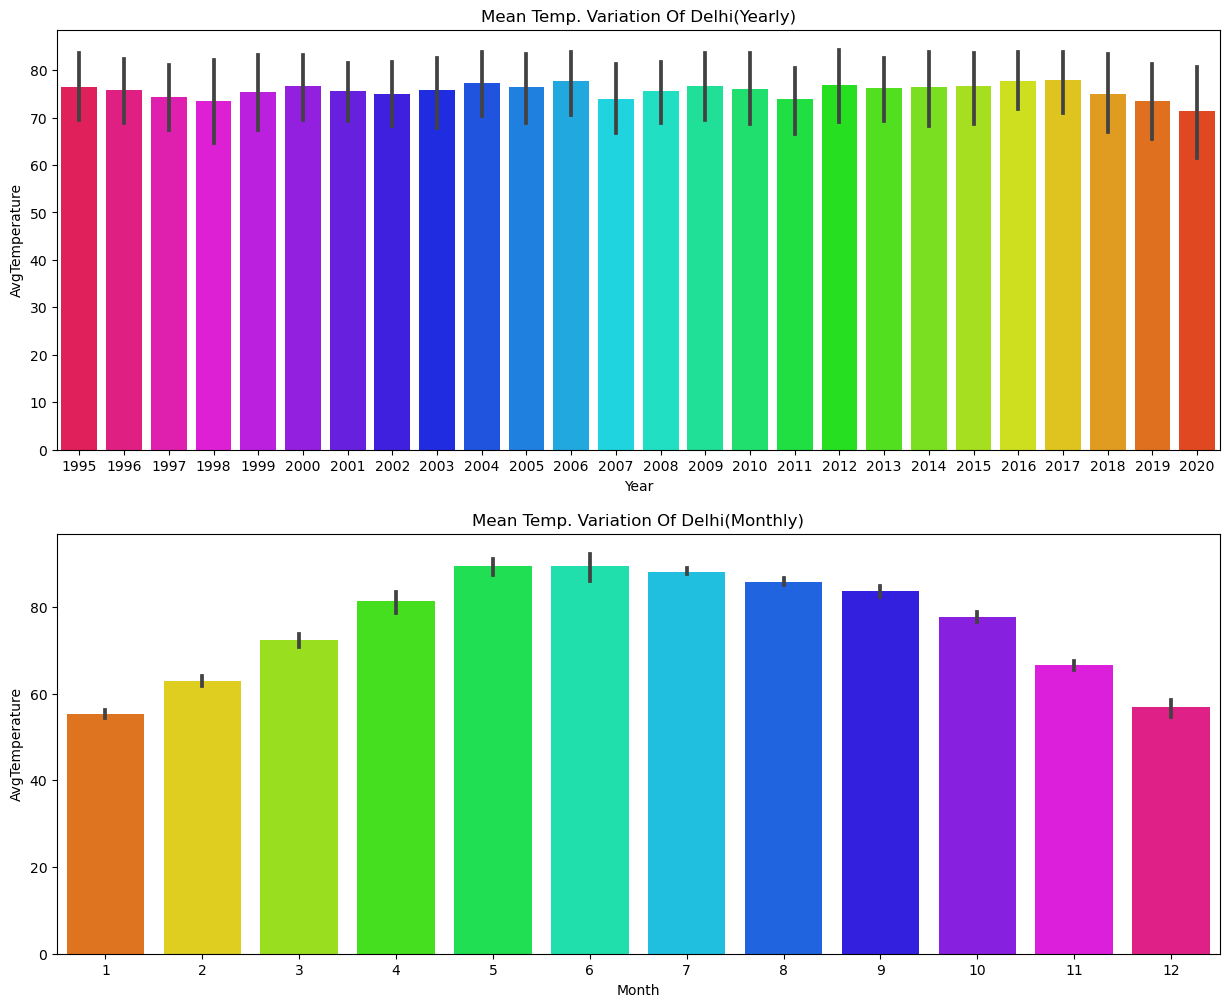

In [22]:
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
sns.barplot(x='Year',y='AvgTemperature',data=y,palette='hsv_r')
plt.title('Mean Temp. Variation Of Delhi(Yearly)')

plt.subplot(2,1,2)
sns.barplot(x='Month',y='AvgTemperature',data=y,palette='hsv')
plt.title('Mean Temp. Variation Of Delhi(Monthly)')

plt.show()

In [24]:
mask1=df['Country']=='India'
mask2=df['Year']==2020

ind=df[mask1 & mask2 ]


k= ind.groupby(['Year','City','Month'])['AvgTemperature'].mean().reset_index().sort_values(by='AvgTemperature',ascending=False)
k.style.background_gradient(cmap='Greens')